D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:25: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.


[0, 347, 975, 1419, 2877, 4134]
0
1
2
3
4
0
1
2
3
4


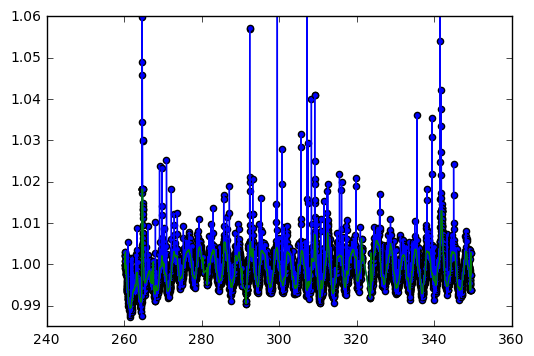

In [30]:
import os
import numpy  as np
from matplotlib import pyplot as plt
import pandas as pd

os.chdir("D:\starspiritstorm\LAMOST_Kepler") # Change Directory

#loading tables of Teff and Radius
Parameter_file = 'Kepler M dwarf flare list 20161012.csv'
Parameter_data = pd.read_csv(Parameter_file)

#load the data
KID = 'kplr012646841_Q17'
os.chdir("D:\starspiritstorm\Course\Meeting\Kepler\Kepler Revised Teff to 3800\Hyperflare\%s"%KID) # Change Directory

binsize = 10


name = 'kplr012646841-2009350155506_llc.fits.lc'

filej = open(name)
data = np.loadtxt( filej , dtype={'names':('time', '2', '3','flux','5'), 'formats':('f4','f4','f4','f4','f4')})

#mask the nan point
masknan = -np.isnan(data['flux'])

#print data['flux']
#print np.isnan(data['flux'])
#print masknan
#print data['flux'][masknan]

time = data['time'][masknan]
flux = data['flux'][masknan]/np.mean(data['flux'][masknan])
flux_raw = data['flux'][masknan]/np.mean(data['flux'][masknan])

#make empty array as same length as masked flux
fluxC = np.zeros(len(flux))
    
#separate gap when time step > 3*time step 
separationtime = []
separationtime.append(0)
for i in range(len(time)-1):
    if time[i+1] - time[i] > 3*(time[2] - time[1]):
        separationtime.append(i)
separationtime.append(len(time))
print separationtime

#do j times
for j in range(2):
    for k in range(len(separationtime)-1):
        print k
        #take 10 point mean and replace it
        for i in range(separationtime[k],separationtime[k+1]):
            
            if i >= (separationtime[k]+binsize) and i <= (separationtime[k+1]-binsize): 
                fluxC[i] = np.median(flux[i-binsize:i+binsize])
            else :
                fluxC[i] = flux[i]
        
        #Observed subtract Caculate 
        fluxdiff = flux-fluxC
            
        #move out the peak value > 1 sigma
        maskpeak = fluxdiff > 1.0*fluxdiff.std()
            
        #if the peak larger than standard deviation then repalce the number by 10 point median
        for n, i in enumerate(maskpeak):
            if i:
                if n >= (separationtime[k]+binsize) and n <= (separationtime[k+1]-binsize):
                    flux[n] = np.median(flux[n-binsize:n+binsize])
                else :
                    flux[n] = flux[n]

plt.plot(time,flux_raw)
plt.scatter(time,flux_raw)
plt.plot(time,fluxC)
plt.scatter(time,fluxC)
plt.ylim(0.985,1.06)
plt.show()
plt.clf()